In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("data/Online Retail.xlsx")  
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#I want to check the no of unique customers
df['CustomerID'].nunique() #4372
#I want to check the no of unique stock codes
df['StockCode'].nunique() #4070
#I want to check the no of unique Descriptions
df['Description'].nunique() #4223

4223

In [6]:
# I want to chexk the first and last invoice date
df['InvoiceDate'].min() #2010-12-01 08:26:00
df['InvoiceDate'].max() #2011-12-09 12:50:00

Timestamp('2010-12-01 08:26:00')

In [ ]:
#I want to check the no of transactions (invoice no) per customer 
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
#I want to check the average no of transactions per customer
df.groupby('CustomerID')['InvoiceNo'].nunique().mean() ##5.07

5.07548032936871

In [12]:
#I want to check the first and last transaction date of each customer
df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).sort_values(by='min')

,min,max
CustomerID,,
17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00
13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00
12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00
13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00
15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00
...,...,...
13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00
15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00
13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00


### Keeping only the UK transactions

In [13]:
# I want to keep only those rows where the location is UK and drop the location column
uk_df = df[df['Country'] == 'United Kingdom'].drop(columns=['Country'])

In [8]:
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0


In [14]:
#No of unique customers in UK
uk_df['CustomerID'].nunique() #3950

3950

In [12]:
#No of unique products in UK
uk_df['StockCode'].nunique() #4065
uk_df['Description'].nunique() #4202

4202

In [15]:
#I am not seeing any point in stock code, so I will drop it
uk_df = uk_df.drop(columns=['StockCode'])

In [14]:
uk_df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0


In [17]:
#I want to check the no of transactions (invoice no) per customer and first and last transaction date of each customer
uk_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
uk_df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).sort_values(by='min')


CustomerID
12748.0    224
17841.0    169
14606.0    128
13089.0    118
15311.0    118
          ... 
17030.0      1
14861.0      1
15986.0      1
13858.0      1
14055.0      1
Name: InvoiceNo, Length: 3950, dtype: int64

In [16]:
#In Invoice Date I only want to keep the date part and drop the time part
uk_df['InvoiceDate'] = uk_df['InvoiceDate'].dt.date


In [13]:
uk_df.to_csv('data/uk_retail_data.csv', index=False)

In [17]:
#i want to see transaction history of customer 17850
customer_17850 = uk_df[uk_df['CustomerID'] == 17850]
customer_17850.sort_values(by='InvoiceDate')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0
293,536396,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0
292,536396,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0
291,536396,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0
290,536396,WOODEN FRAME ANTIQUE WHITE,12,2010-12-01,2.55,17850.0
...,...,...,...,...,...,...
86890,C543611,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10,4.95,17850.0
86888,C543611,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10,4.95,17850.0
86901,C543611,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10,4.95,17850.0
86894,C543611,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10,4.95,17850.0


## Doing Some Time Series Analysis

### Using ARIMA model

=== CUSTOMER 12748 ANALYSIS ===

1. TIME SERIES OVERVIEW:
   • Date range: 2010-12-01 to 2011-12-09
   • Total days: 374
   • Active days (purchases > 0): 109
   • Purchase frequency: 29.1%
   • Average daily spend: £77.73
   • Average spend on active days: £296.41
   • Total customer value: £29072.10

2. TREND ANALYSIS:
   • Customer shows increasing trend (+111.8% change)
   • Highest average spending day: Wednesday (£458.99)

3. STATIONARITY TEST:
   • ADF p-value: 0.0000
   • Series is stationary

4. ARIMA MODEL ANALYSIS:
   • AIC: 5278.01
   • Log Likelihood: -2636.00
   • Residuals appear normal (Ljung-Box p-value: 0.1202)

5. FORECAST INSIGHTS:
   • 30-day forecast average: £215.93/day
   • Recent 30-day average: £299.08/day
   • Predicted change: -27.8%
   • Forecast range: £-344.07 - £775.92
   • Expected 30-day total: £6477.84

6. BUSINESS INSIGHTS:
   • Customer lifecycle stage: Active & Growing
   • Days since last purchase: 0
   • Recent 60-day trend: +106.3%
   • Average 

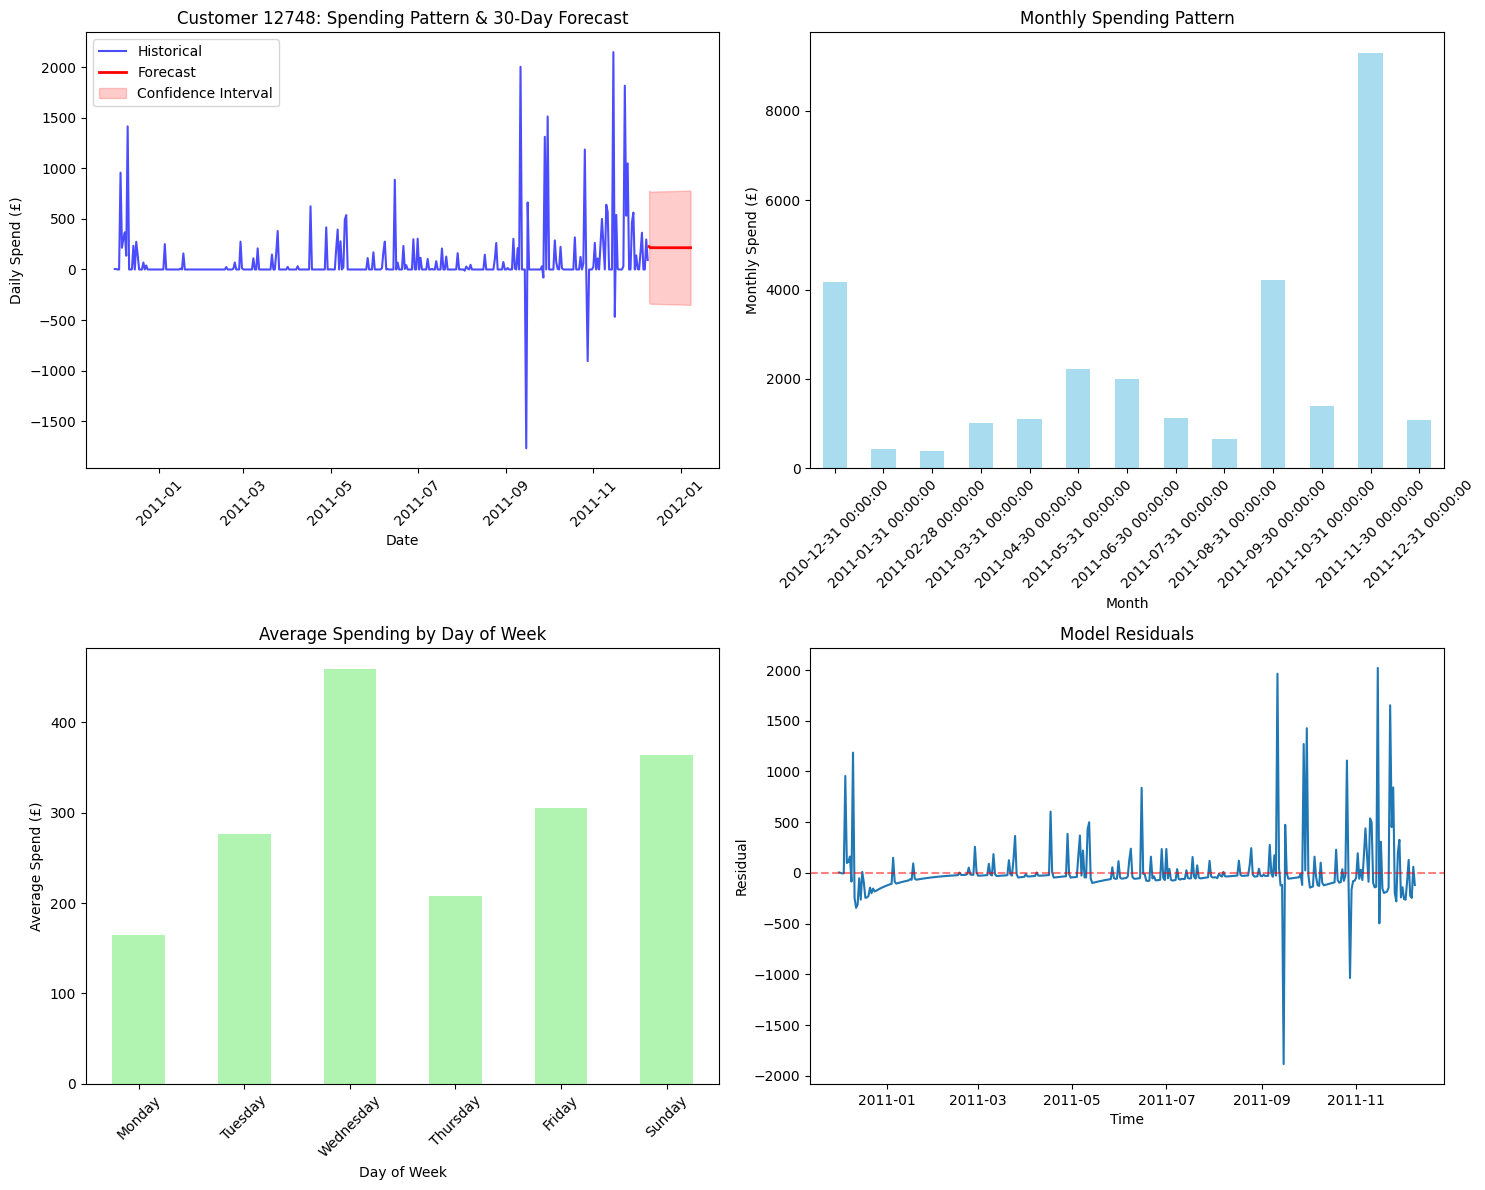


7. ACTIONABLE RECOMMENDATIONS:
   • 📉 PROACTIVE INTERVENTION: Despite recent activity, model predicts spending decline
   • Recommend: Schedule check-in call, offer loyalty incentives
   • Root cause analysis: Seasonal effect vs. genuine disengagement
   • 💎 VIP TREATMENT: High-value customer
   • CRITICAL: High-value customer at risk - assign dedicated account manager

   📊 SUMMARY:
   • Customer Status: Active & Growing
   • Expected 30-day revenue: £6477.84
   • Forecast vs Recent: -27.8%
   • Action Priority: HIGH


In [10]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Your existing code (assuming uk_df is loaded)
customer_id = 12748
customer_df = uk_df[uk_df['CustomerID'] == customer_id].copy()
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])
customer_df['TotalAmount'] = customer_df['Quantity'] * customer_df['UnitPrice']
ts = customer_df.groupby('InvoiceDate')['TotalAmount'].sum()
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq('D').fillna(0)

print(f"=== CUSTOMER {customer_id} ANALYSIS ===\n")

# 1. BASIC TIME SERIES STATISTICS
print("1. TIME SERIES OVERVIEW:")
print(f"   • Date range: {ts.index.min().strftime('%Y-%m-%d')} to {ts.index.max().strftime('%Y-%m-%d')}")
print(f"   • Total days: {len(ts)}")
print(f"   • Active days (purchases > 0): {(ts > 0).sum()}")
print(f"   • Purchase frequency: {(ts > 0).sum() / len(ts) * 100:.1f}%")
print(f"   • Average daily spend: £{ts.mean():.2f}")
print(f"   • Average spend on active days: £{ts[ts > 0].mean():.2f}")
print(f"   • Total customer value: £{ts.sum():.2f}")

# 2. TREND AND SEASONALITY ANALYSIS
print("\n2. TREND ANALYSIS:")
# Split into periods for trend analysis
mid_point = len(ts) // 2
first_half = ts[:mid_point]
second_half = ts[mid_point:]

first_half_avg = first_half.mean()
second_half_avg = second_half.mean()
trend_change = ((second_half_avg - first_half_avg) / first_half_avg) * 100

if abs(trend_change) > 10:
    trend_direction = "increasing" if trend_change > 0 else "decreasing"
    print(f"   • Customer shows {trend_direction} trend ({trend_change:+.1f}% change)")
else:
    print(f"   • Customer shows stable spending pattern ({trend_change:+.1f}% change)")

# Day of week analysis
ts_with_dow = ts.to_frame('amount')
ts_with_dow['day_of_week'] = ts_with_dow.index.day_name()
dow_avg = ts_with_dow[ts_with_dow['amount'] > 0].groupby('day_of_week')['amount'].mean()
if len(dow_avg) > 0:
    best_day = dow_avg.idxmax()
    print(f"   • Highest average spending day: {best_day} (£{dow_avg[best_day]:.2f})")

# 3. STATIONARITY TEST
print("\n3. STATIONARITY TEST:")
adf_result = adfuller(ts.dropna())
is_stationary = adf_result[1] < 0.05
print(f"   • ADF p-value: {adf_result[1]:.4f}")
print(f"   • Series is {'stationary' if is_stationary else 'non-stationary'}")

# 4. MODEL FITTING AND DIAGNOSTICS
print("\n4. ARIMA MODEL ANALYSIS:")
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

print(f"   • AIC: {model_fit.aic:.2f}")
print(f"   • Log Likelihood: {model_fit.llf:.2f}")

# Model diagnostics
residuals = model_fit.resid
ljung_box = acorr_ljungbox(residuals, lags=10, return_df=True)
residuals_normal = ljung_box['lb_pvalue'].iloc[-1] > 0.05
print(f"   • Residuals appear {'normal' if residuals_normal else 'non-normal'} (Ljung-Box p-value: {ljung_box['lb_pvalue'].iloc[-1]:.4f})")

# 5. FORECAST AND INSIGHTS
print("\n5. FORECAST INSIGHTS:")
forecast = model_fit.forecast(steps=30)
forecast_ci = model_fit.get_forecast(steps=30).conf_int()

forecast_avg = forecast.mean()
current_avg = ts[-30:].mean()  # Last 30 days average
forecast_change = ((forecast_avg - current_avg) / current_avg) * 100 if current_avg > 0 else 0

print(f"   • 30-day forecast average: £{forecast_avg:.2f}/day")
print(f"   • Recent 30-day average: £{current_avg:.2f}/day")
print(f"   • Predicted change: {forecast_change:+.1f}%")
print(f"   • Forecast range: £{forecast_ci.iloc[:, 0].mean():.2f} - £{forecast_ci.iloc[:, 1].mean():.2f}")

# Expected monthly value
monthly_forecast = forecast.sum()
print(f"   • Expected 30-day total: £{monthly_forecast:.2f}")

# 6. BUSINESS INSIGHTS
print("\n6. BUSINESS INSIGHTS:")

# Enhanced Customer lifecycle stage analysis
days_since_last = (ts.index[-1] - ts[ts > 0].index[-1]).days if (ts > 0).any() else 0

# Analyze recent activity trend (last 60 vs previous 60 days)
recent_60 = ts[-60:].mean()
previous_60 = ts[-120:-60].mean() if len(ts) >= 120 else ts[:-60].mean()
recent_trend = ((recent_60 - previous_60) / previous_60) * 100 if previous_60 > 0 else 0

# More sophisticated lifecycle determination
if days_since_last == 0 and recent_trend >= 0:
    lifecycle = "Active & Growing"
elif days_since_last == 0 and recent_trend < -20:
    lifecycle = "Active but Declining"
elif days_since_last == 0:
    lifecycle = "Active (Stable)"
elif days_since_last <= 7:
    lifecycle = "Recently Active"
elif days_since_last <= 30:
    lifecycle = "At Risk"
else:
    lifecycle = "Churned"

print(f"   • Customer lifecycle stage: {lifecycle}")
print(f"   • Days since last purchase: {days_since_last}")
print(f"   • Recent 60-day trend: {recent_trend:+.1f}%")

# Purchase patterns
purchase_intervals = np.diff(ts[ts > 0].index).astype('timedelta64[D]').astype(int)
if len(purchase_intervals) > 0:
    avg_interval = purchase_intervals.mean()
    print(f"   • Average days between purchases: {avg_interval:.1f}")
    
    # Predict next purchase probability
    if avg_interval > 0:
        next_purchase_prob = max(0, 1 - (days_since_last / avg_interval))
        print(f"   • Probability of purchase in next 7 days: {next_purchase_prob * 100:.1f}%")

# Value segmentation
if ts.sum() > ts.quantile(0.8):
    value_segment = "High Value"
elif ts.sum() > ts.quantile(0.5):
    value_segment = "Medium Value"
else:
    value_segment = "Low Value"
print(f"   • Customer value segment: {value_segment}")

# 7. VISUALIZATION
plt.figure(figsize=(15, 12))

# Subplot 1: Historical data and forecast
plt.subplot(2, 2, 1)
plt.plot(ts.index, ts.values, 'b-', alpha=0.7, label='Historical')
forecast_dates = pd.date_range(start=ts.index[-1] + timedelta(days=1), periods=30, freq='D')
plt.plot(forecast_dates, forecast, 'r-', label='Forecast', linewidth=2)
plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], 
                 color='red', alpha=0.2, label='Confidence Interval')
plt.title(f'Customer {customer_id}: Spending Pattern & 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Daily Spend (£)')
plt.legend()
plt.xticks(rotation=45)

# Subplot 2: Monthly aggregation
plt.subplot(2, 2, 2)
monthly_ts = ts.resample('M').sum()
monthly_ts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Monthly Spending Pattern')
plt.xlabel('Month')
plt.ylabel('Monthly Spend (£)')
plt.xticks(rotation=45)

# Subplot 3: Day of week pattern
plt.subplot(2, 2, 3)
if len(dow_avg) > 0:
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_avg_ordered = dow_avg.reindex([d for d in dow_order if d in dow_avg.index])
    dow_avg_ordered.plot(kind='bar', color='lightgreen', alpha=0.7)
    plt.title('Average Spending by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Spend (£)')
    plt.xticks(rotation=45)

# Subplot 4: Residuals analysis
plt.subplot(2, 2, 4)
plt.plot(residuals)
plt.title('Model Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 8. ACTIONABLE RECOMMENDATIONS
print("\n7. ACTIONABLE RECOMMENDATIONS:")

# More nuanced recommendations based on multiple factors
if lifecycle == "Active but Declining":
    print("   • ⚠️  URGENT ATTENTION: Customer is active but showing declining spend pattern")
    print("   • Recommend: Immediate personalized outreach to understand changing needs")
    print("   • Consider: Product recommendations, exclusive deals, customer satisfaction survey")
    
elif lifecycle == "At Risk" or lifecycle == "Churned":
    print("   • 🚨 RETENTION FOCUS: Customer shows signs of churn")
    print("   • Recommend: Re-engagement campaign, personalized offers")
    
if forecast_change < -20 and lifecycle.startswith("Active"):
    print("   • 📉 PROACTIVE INTERVENTION: Despite recent activity, model predicts spending decline")
    print("   • Recommend: Schedule check-in call, offer loyalty incentives")
    print("   • Root cause analysis: Seasonal effect vs. genuine disengagement")
    
elif forecast_change > 20:
    print("   • 📈 GROWTH OPPORTUNITY: Model predicts spending increase")
    print("   • Recommend: Upselling, premium product recommendations")

if value_segment == "High Value":
    print("   • 💎 VIP TREATMENT: High-value customer")
    if forecast_change < -20:
        print("   • CRITICAL: High-value customer at risk - assign dedicated account manager")
    else:
        print("   • Recommend: Maintain premium service, exclusive early access to products")

# Add model reliability warning
if not residuals_normal:
    print("   • ⚠️  MODEL CAUTION: Forecast reliability is medium - use additional indicators")

print(f"\n   📊 SUMMARY:")
print(f"   • Customer Status: {lifecycle}")
print(f"   • Expected 30-day revenue: £{monthly_forecast:.2f}")
print(f"   • Forecast vs Recent: {forecast_change:+.1f}%")
print(f"   • Action Priority: {'HIGH' if (value_segment == 'High Value' and forecast_change < -20) else 'MEDIUM' if forecast_change < -20 else 'LOW'}")